# Understanding Gene Relationships through Various Network Visualization Approaches

In [1]:
import pandas as pd

In [2]:
from statistics import *

In [3]:
import netrd as net

In [4]:
from scipy import stats

In [5]:
import random

In [170]:
from datetime import datetime

In [317]:
# viz:
import seaborn as sns
import matplotlib.pyplot as plt

## Achilles Data
Source: [DepMap](https://depmap.org/portal/achilles/)

Download portal: [Achilles](https://depmap.org/portal/download/all/)

## Gene Effect (NNMD - Null-Normalized Mean Difference)

In [7]:
start_time = datetime.now()
gene_effect = pd.read_csv('data/achilles_gene_effect.csv')
print('elapsed time:', datetime.now() - start_time)

In [8]:
gene_effect=gene_effect.set_index('Unnamed: 0');

In [9]:
gene_effect=gene_effect.rename(index={'Unnamed: 0':'cell_line'})

In [10]:
gene_effect.shape

(625, 18333)

In [11]:
gene_effect

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ACH-000004,0.168684,0.089128,-0.196966,-0.021260,0.038541,-0.175141,0.349346,-0.441008,0.291208,0.147993,...,-0.135665,-0.461810,NaN,NaN,0.253495,0.233904,-0.406140,0.283878,0.230978,-0.135112
ACH-000005,-0.068759,0.218792,0.178252,0.158390,-0.193862,-0.324566,0.246220,-0.576495,-0.081217,0.016182,...,-0.176432,-0.391199,-0.182117,-0.108978,0.186545,-0.075884,-0.095781,0.029269,0.000945,-0.242038
ACH-000007,0.053893,0.081444,-0.060170,0.153435,0.087362,0.150684,0.061146,-0.470462,-0.012210,0.277616,...,-0.101852,-0.276755,-0.030821,0.121126,0.214875,-0.019300,-0.342632,0.083610,-0.392722,-0.443380
ACH-000009,0.059874,-0.011153,-0.054367,0.060886,0.039767,0.043527,0.011845,-0.630290,0.161797,0.033587,...,-0.355880,-0.290047,-0.031825,0.115886,0.116784,0.035294,-0.575523,0.228940,-0.114559,-0.549906
ACH-000011,0.277165,0.085354,0.007972,0.445843,-0.036717,-0.261409,0.111173,-0.430867,0.138193,0.120785,...,-0.418769,-0.518908,-0.128187,-0.126336,0.269698,0.148516,-0.227106,0.120656,-0.252444,-0.401821
ACH-000012,0.008073,0.167177,0.088705,0.307599,0.015440,-0.137284,0.264126,-0.491951,0.073552,0.308495,...,-0.393597,-0.834722,0.062316,-0.045060,0.133700,0.122965,-0.132978,0.050321,-0.175689,-0.402526
ACH-000013,0.062131,0.038687,-0.043841,0.200285,-0.070484,-0.072263,0.058271,-0.474665,0.031876,0.268895,...,0.008042,0.124692,-0.058500,-0.040608,0.238244,-0.030644,-0.172263,0.145374,-0.206768,-0.540681
ACH-000014,0.143078,-0.035837,0.010997,0.182625,-0.034048,-0.100745,-0.147548,-0.478343,-0.073118,0.163341,...,-0.193486,-0.932615,NaN,NaN,-0.065987,0.024524,-0.191035,-0.059532,0.220589,-0.328847
ACH-000015,-0.090890,0.007894,-0.185690,0.111529,-0.033507,-0.120201,0.240126,-0.369685,0.164322,0.232466,...,-0.103288,-0.237725,-0.048158,-0.014440,0.334302,0.178671,-0.271045,0.178024,-0.278946,-0.207964


In [88]:
stats.describe(gene_effect[random.choice(list(gene_effect.columns))])

DescribeResult(nobs=625, minmax=(-0.6763670595810001, 0.58019543607), mean=-0.10729174599614658, variance=0.01811215627779713, skewness=-0.10630537408008697, kurtosis=2.1831947582333875)

Visualizing NNMD Distributions of 100 random genes from gene_effect data


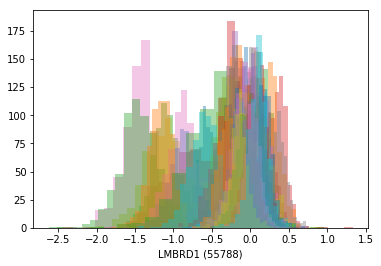

In [13]:
print('Visualizing NNMD Distributions of 100 random genes from gene_effect data')
for g in random.sample(list(gene_effect.columns), 100):
    sns.distplot(gene_effect[g].fillna(0),bins=20,kde=False)

In [14]:
gene_effect.min().min()

-4.4923381539

In [15]:
gene_effect.min().sort_values(ascending=True).head(5)

RAN (5901)          -4.492338
BUB3 (9184)         -3.961129
HIST2H3A (333932)   -3.888375
HSPE1 (3336)        -3.634067
EEF2 (1938)         -3.522135
dtype: float64

In [16]:
gene_effect.max().max()

6.384527418539999

In [17]:
gene_effect.max().sort_values(ascending=False).head(5)

PTEN (5728)         6.384527
TP53 (7157)         4.831093
ARRDC3 (57561)      3.974578
GPAT4 (137964)      3.070844
NPIPB15 (440348)    3.054422
dtype: float64

In [19]:
dt=pd.DataFrame(gene_effect.dtypes)
dt.head(5)

,0
A1BG (1),float64
A1CF (29974),float64
A2M (2),float64
A2ML1 (144568),float64
A3GALT2 (127550),float64


## Gene Dependency
**Note:** We chose to use the `gene dependency` data set instead of the `gene effect` data set because the `gene effect` data set is the CERES score with a Null-Normalized Mean Difference (difference from the null model of cell line survival), whereas the `gene dependency` data set is a simple probability ( 0 < p < 1 ) of importance from the null model of cell line survival. Learn more at the [DepMap FAQs](https://depmap.org/portal/faq/)

In [21]:
start_time = datetime.now()
gene_dep = pd.read_csv('data/achilles_gene_dependency.csv').set_index('Unnamed: 0')
print('elapsed time:', datetime.now() - start_time)

In [22]:
gene_dep.shape

(625, 18333)

In [23]:
gene_dep.head(10)

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ACH-000004,0.001451,0.004520,0.102872,0.018067,0.008767,0.085647,0.000065,0.431382,0.000192,0.001974,...,0.060016,0.465022,NaN,NaN,0.000372,0.000517,0.374798,0.000220,0.000541,0.059707
ACH-000005,0.026104,0.001092,0.001859,0.002384,0.073250,0.175472,0.000745,0.528323,0.029178,0.011600,...,0.064166,0.252776,0.067042,0.037138,0.001671,0.027810,0.033134,0.010160,0.013513,0.103597
ACH-000007,0.004364,0.003030,0.017460,0.001112,0.002801,0.001155,0.003964,0.432981,0.009979,0.000158,...,0.027625,0.137708,0.012447,0.001760,0.000440,0.010849,0.219132,0.002946,0.296057,0.383729
ACH-000009,0.002986,0.008234,0.014550,0.002942,0.004015,0.003802,0.005994,0.671296,0.000620,0.004395,...,0.240007,0.154809,0.010861,0.001271,0.001252,0.004284,0.592691,0.000227,0.030041,0.552916
ACH-000011,0.000254,0.003716,0.009770,0.000015,0.016456,0.131691,0.002650,0.350667,0.001843,0.002332,...,0.331856,0.493477,0.042943,0.042179,0.000285,0.001603,0.101851,0.002336,0.123363,0.306065
ACH-000012,0.006585,0.000650,0.002101,0.000076,0.005949,0.039098,0.000148,0.496048,0.002616,0.000075,...,0.316770,0.903348,0.003081,0.013213,0.001073,0.001261,0.037322,0.003660,0.058364,0.332458
ACH-000013,0.004887,0.006845,0.020258,0.000569,0.027806,0.028374,0.005170,0.505162,0.007531,0.000194,...,0.010434,0.001892,0.024174,0.019491,0.000312,0.017229,0.079498,0.001365,0.107523,0.619927
ACH-000014,0.001156,0.012898,0.007196,0.000637,0.012610,0.027250,0.044594,0.451602,0.019987,0.000854,...,0.069487,0.932838,NaN,NaN,0.018422,0.006032,0.067962,0.017100,0.000352,0.204259
ACH-000015,0.026106,0.007272,0.072215,0.001568,0.012737,0.036572,0.000224,0.290348,0.000692,0.000250,...,0.030156,0.115563,0.015421,0.009875,0.000063,0.000555,0.151136,0.000561,0.160490,0.089013


Visualizing Probability Distributions of 100 random genes from gene_dependency data


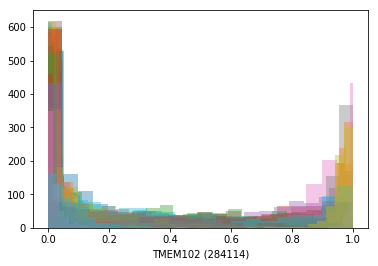

In [24]:
print('Visualizing Probability Distributions of 100 random genes from gene_dependency data')
for g in random.sample(list(gene_dep.columns), 100):
    sns.distplot(gene_dep[g].fillna(0),bins=20,kde=False)

In [25]:
gene_dep.min().sort_values(ascending=True).head(5)

IL33 (90865)       0.0
TLR5 (7100)        0.0
GJA1 (2697)        0.0
GIMAP4 (55303)     0.0
GGTLC3 (728226)    0.0
dtype: float64

In [26]:
gene_dep.max().sort_values(ascending=False).head(5)

CHMP3 (51652)     1.0
RPL12 (6136)      1.0
RPAP2 (79871)     1.0
CHMP6 (79643)     1.0
SMARCB1 (6598)    1.0
dtype: float64

## DepMap Cell Line Metadata

In [29]:
cell_lines = pd.read_csv('data/depmap-2019q1-celllines_v2.csv')

In [30]:
cell_lines.head(5)

,DepMap_ID,CCLE_Name,Aliases,COSMIC_ID,Sanger ID,Primary Disease,Subtype Disease,Gender,Source
0,ACH-000001,NIHOVCAR3_OVARY,NIH:OVCAR-3;OVCAR3,905933.0,2201.0,Ovarian Cancer,"Adenocarcinoma, high grade serous",Female,ATCC
1,ACH-000002,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HL-60,905938.0,55.0,Leukemia,"Acute Myelogenous Leukemia (AML), M3 (Promyelo...",Female,ATCC
2,ACH-000003,CACO2_LARGE_INTESTINE,CACO2;CACO2;CaCo-2,NaN,NaN,Colon/Colorectal Cancer,Colon Adenocarcinoma,-1,NaN
3,ACH-000004,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL,907053.0,783.0,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",Male,DSMZ
4,ACH-000005,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL 92.1.7,NaN,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",Male,ATCC


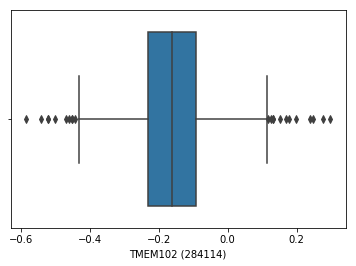

In [31]:
sns.boxplot(gene_effect[g].reset_index()[g])

In [32]:
lines_in_ge = list(gene_effect.index)

In [33]:
# Filter cell lines metadata to only cell lines in the gene effect dataset
metadata = cell_lines[cell_lines['DepMap_ID'].isin(list(gene_effect.index))]

In [34]:
metadata.to_csv('data/filtered_cell_lines_metadata.csv')

In [35]:
metadata.columns

Index(['DepMap_ID', 'CCLE_Name', 'Aliases', 'COSMIC_ID', 'Sanger ID',
       'Primary Disease', 'Subtype Disease', 'Gender', 'Source'],
      dtype='object')

In [81]:
metadata.shape

(622, 9)

In [82]:
diseases = pd.DataFrame(metadata.groupby('Primary Disease').size().sort_values(ascending=False),columns=(['cell_line_count']))
diseases.shape

(28, 1)

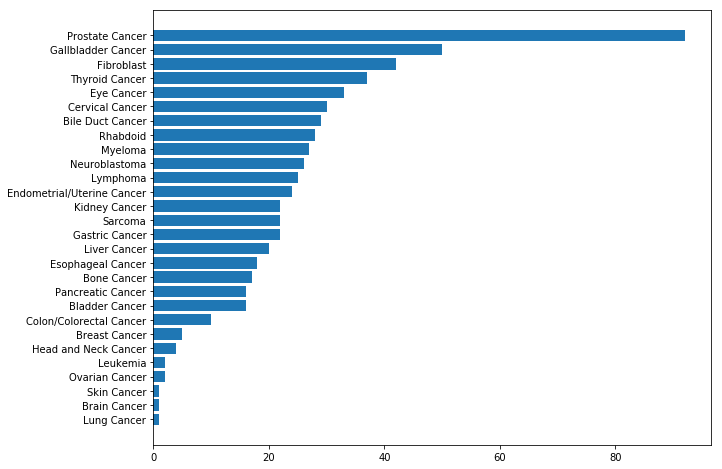

In [68]:
plt.barh(diseases.index,diseases['cell_line_count'].sort_values(ascending=True))
plt.rcParams["figure.figsize"] = (10,10)

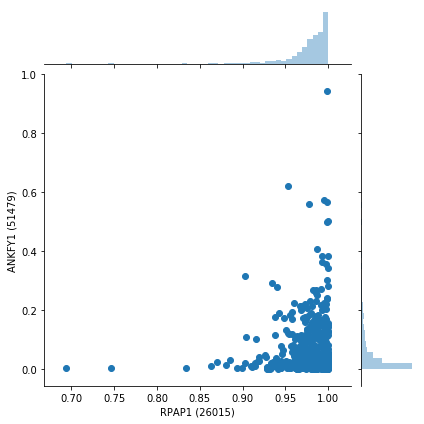

In [87]:
x=random.choice(list(gene_dep.columns))
y=random.choice(list(gene_dep.columns))
g = sns.jointplot(x=x, y=y, data=gene_dep)
g.set_axis_labels(x,y)

## Gene Dependency Ranks by Cell Line

In [167]:
ranks = pd.DataFrame(index=gene_dep.columns, columns=list(gene_dep.index))

In [254]:
cell_line = random.choice(list(gene_dep.index))
gene = random.choice(list(gene_dep.columns))
gene_dep.loc[cell_line].rank().head(10)

A1BG (1)             8554.0
A1CF (29974)        11067.0
A2M (2)              7013.0
A2ML1 (144568)        595.0
A3GALT2 (127550)     7905.0
A4GALT (53947)       8000.0
A4GNT (51146)        2060.0
AAAS (8086)         16612.0
AACS (65985)         1342.0
AADAC (13)           1518.0
Name: ACH-000486, dtype: float64

In [191]:
start_time = datetime.now()
i=1
r=list(gene_dep.index)
l=len(r)
for cell_line in r:
    print('analyzing cell line',cell_line,i,"of",l)
    ranks[cell_line]=gene_dep.loc[cell_line].rank()
    i+=1
print('elapsed time:', datetime.now() - start_time)

analyzing cell line ACH-000004 1 of 625
analyzing cell line ACH-000005 2 of 625
analyzing cell line ACH-000007 3 of 625
analyzing cell line ACH-000009 4 of 625
analyzing cell line ACH-000011 5 of 625
analyzing cell line ACH-000012 6 of 625
analyzing cell line ACH-000013 7 of 625
analyzing cell line ACH-000014 8 of 625
analyzing cell line ACH-000015 9 of 625
analyzing cell line ACH-000017 10 of 625
analyzing cell line ACH-000018 11 of 625
analyzing cell line ACH-000019 12 of 625
analyzing cell line ACH-000021 13 of 625
analyzing cell line ACH-000022 14 of 625
analyzing cell line ACH-000025 15 of 625
analyzing cell line ACH-000028 16 of 625
analyzing cell line ACH-000029 17 of 625
analyzing cell line ACH-000030 18 of 625
analyzing cell line ACH-000035 19 of 625
analyzing cell line ACH-000036 20 of 625
analyzing cell line ACH-000037 21 of 625
analyzing cell line ACH-000039 22 of 625
analyzing cell line ACH-000040 23 of 625
analyzing cell line ACH-000041 24 of 625
analyzing cell line ACH-0

/anaconda/lib/python3.6/site-packages/pandas/core/internals.py:389: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  self.values = np.delete(self.values, loc, 0)
/anaconda/lib/python3.6/site-packages/pandas/core/internals.py:390: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  self.mgr_locs = self.mgr_locs.delete(loc)


analyzing cell line ACH-000060 32 of 625
analyzing cell line ACH-000067 33 of 625
analyzing cell line ACH-000070 34 of 625
analyzing cell line ACH-000075 35 of 625
analyzing cell line ACH-000078 36 of 625
analyzing cell line ACH-000082 37 of 625
analyzing cell line ACH-000085 38 of 625
analyzing cell line ACH-000086 39 of 625
analyzing cell line ACH-000087 40 of 625
analyzing cell line ACH-000092 41 of 625
analyzing cell line ACH-000095 42 of 625
analyzing cell line ACH-000096 43 of 625
analyzing cell line ACH-000097 44 of 625
analyzing cell line ACH-000098 45 of 625
analyzing cell line ACH-000099 46 of 625
analyzing cell line ACH-000108 47 of 625
analyzing cell line ACH-000113 48 of 625
analyzing cell line ACH-000115 49 of 625
analyzing cell line ACH-000116 50 of 625
analyzing cell line ACH-000118 51 of 625
analyzing cell line ACH-000120 52 of 625
analyzing cell line ACH-000123 53 of 625
analyzing cell line ACH-000127 54 of 625
analyzing cell line ACH-000128 55 of 625
analyzing cell l

analyzing cell line ACH-000470 230 of 625
analyzing cell line ACH-000471 231 of 625
analyzing cell line ACH-000472 232 of 625
analyzing cell line ACH-000473 233 of 625
analyzing cell line ACH-000475 234 of 625
analyzing cell line ACH-000476 235 of 625
analyzing cell line ACH-000477 236 of 625
analyzing cell line ACH-000478 237 of 625
analyzing cell line ACH-000480 238 of 625
analyzing cell line ACH-000481 239 of 625
analyzing cell line ACH-000483 240 of 625
analyzing cell line ACH-000484 241 of 625
analyzing cell line ACH-000485 242 of 625
analyzing cell line ACH-000486 243 of 625
analyzing cell line ACH-000487 244 of 625
analyzing cell line ACH-000488 245 of 625
analyzing cell line ACH-000490 246 of 625
analyzing cell line ACH-000491 247 of 625
analyzing cell line ACH-000493 248 of 625
analyzing cell line ACH-000495 249 of 625
analyzing cell line ACH-000496 250 of 625
analyzing cell line ACH-000498 251 of 625
analyzing cell line ACH-000499 252 of 625
analyzing cell line ACH-000500 253

analyzing cell line ACH-000838 428 of 625
analyzing cell line ACH-000839 429 of 625
analyzing cell line ACH-000840 430 of 625
analyzing cell line ACH-000841 431 of 625
analyzing cell line ACH-000843 432 of 625
analyzing cell line ACH-000846 433 of 625
analyzing cell line ACH-000847 434 of 625
analyzing cell line ACH-000848 435 of 625
analyzing cell line ACH-000849 436 of 625
analyzing cell line ACH-000851 437 of 625
analyzing cell line ACH-000853 438 of 625
analyzing cell line ACH-000855 439 of 625
analyzing cell line ACH-000856 440 of 625
analyzing cell line ACH-000858 441 of 625
analyzing cell line ACH-000859 442 of 625
analyzing cell line ACH-000861 443 of 625
analyzing cell line ACH-000862 444 of 625
analyzing cell line ACH-000865 445 of 625
analyzing cell line ACH-000866 446 of 625
analyzing cell line ACH-000867 447 of 625
analyzing cell line ACH-000869 448 of 625
analyzing cell line ACH-000872 449 of 625
analyzing cell line ACH-000873 450 of 625
analyzing cell line ACH-000876 451

IndexError: index 1 is out of bounds for axis 0 with size 1

In [192]:
ranks

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
A1BG (1),2157.0,9283.0,5974.0,4547.0,726.0,6645.0,4814.0,2770.0,10265.0,2005.0,...,2263.0,8525.0,6952.0,1150.0,5339.0,2401.0,2387.0,9692.0,10047.0,1722.0
A1CF (29974),4097.0,2151.0,5117.0,6972.0,4673.0,1772.0,5660.0,7878.0,6771.0,3759.0,...,6572.0,3726.0,298.0,2155.0,2890.0,6289.0,11554.0,4134.0,2873.0,6946.0
A2M (2),12337.0,2862.0,9501.0,8510.0,7230.0,3804.0,8849.0,6429.0,12913.0,9835.0,...,11600.0,9162.0,12895.0,11569.0,9665.0,10940.0,13219.0,11490.0,6062.0,2116.0
A2ML1 (144568),7531.0,3271.0,3164.0,4521.0,110.0,257.0,1096.0,1930.0,3348.0,3683.0,...,5372.0,5305.0,1319.0,1853.0,2738.0,4210.0,6047.0,773.0,858.0,12584.0
A3GALT2 (127550),5630.0,12276.0,4953.0,5208.0,8739.0,6374.0,9834.0,7816.0,8266.0,13207.0,...,13344.0,4162.0,8927.0,11428.0,12201.0,11227.0,4192.0,8704.0,10192.0,9420.0
A4GALT (53947),11884.0,14512.0,3245.0,5093.0,14123.0,11503.0,9907.0,9876.0,11204.0,11675.0,...,5271.0,14745.0,8225.0,9918.0,14436.0,4387.0,5051.0,14217.0,6912.0,10658.0
A4GNT (51146),271.0,1750.0,5756.0,6179.0,3926.0,501.0,4946.0,11114.0,836.0,775.0,...,1085.0,4813.0,9051.0,3304.0,3239.0,7420.0,11754.0,641.0,2760.0,15312.0
AAAS (8086),15200.0,16384.0,15938.0,16602.0,15741.0,16134.0,16105.0,15332.0,15544.0,15391.0,...,16314.0,16352.0,16505.0,16284.0,16747.0,16073.0,15689.0,16318.0,15923.0,10503.0
AACS (65985),552.0,9608.0,7993.0,1944.0,3143.0,4269.0,5921.0,9121.0,1969.0,6866.0,...,4693.0,2212.0,8110.0,3702.0,5159.0,9717.0,7085.0,2303.0,6047.0,2827.0
AADAC (13),2597.0,6913.0,1046.0,5444.0,3631.0,250.0,380.0,2331.0,921.0,2074.0,...,2098.0,5349.0,3670.0,3874.0,9135.0,1959.0,4492.0,461.0,1260.0,5405.0


In [193]:
ranks.to_csv('data/gene_dependency_ranks.csv')

Visualizing Rank Distributions of 100 random genes from gene_dependency data


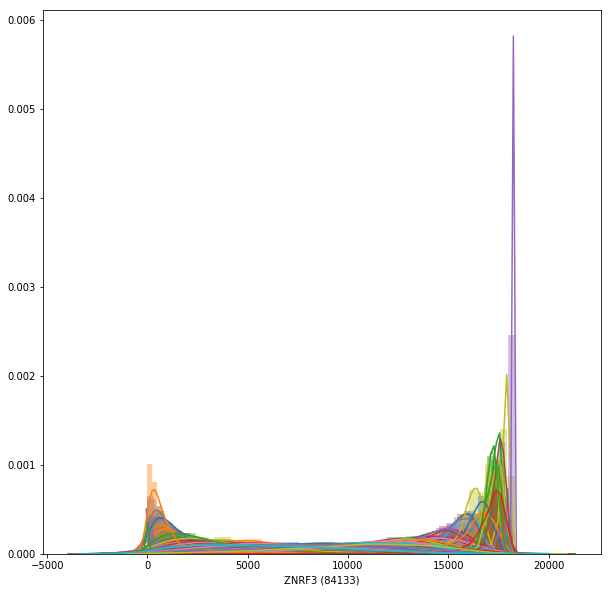

In [252]:
print('Visualizing Rank Distributions of 100 random genes from gene_dependency data')
for g in random.sample(list(ranks.index), 100):
    sns.distplot(ranks.loc[g].fillna(0))

In [239]:
from statistics import variance,mean,median

In [243]:
import numpy as np

In [225]:
median(ranks.loc['A4GALT (53947)'])

14444.0

In [232]:
ranks.loc['A4GALT (53947)'].std()

3233.0449831055644

In [233]:
stats = pd.DataFrame(index=ranks.index,columns=['std','mean','median'])

In [234]:
stats['std']=[ranks.loc[g].std() for g in stats.index]

In [244]:
stats['mean']=[np.nanmean(ranks.loc[g]) for g in stats.index]

In [236]:
stats['median']=[median(ranks.loc[g]) for g in stats.index]

In [237]:
stats.to_csv('data/gene_dependency_rank_stats.csv')

In [253]:
stats.head(10)

,std,mean,median
A1BG (1),3036.964896,4432.475120,3178.0
A1CF (29974),3056.511735,5110.690209,2919.0
A2M (2),2895.717197,8910.746388,14063.0
A2ML1 (144568),2213.282123,2614.568218,561.0
A3GALT2 (127550),3427.635696,8656.020867,6811.0
A4GALT (53947),3233.044983,8374.606742,14444.0
A4GNT (51146),2765.790345,4266.577849,1136.0
AAAS (8086),1103.103729,15900.112360,16063.0
AACS (65985),3155.456537,4983.234350,1694.0
AADAC (13),2874.308747,3390.626003,1366.0


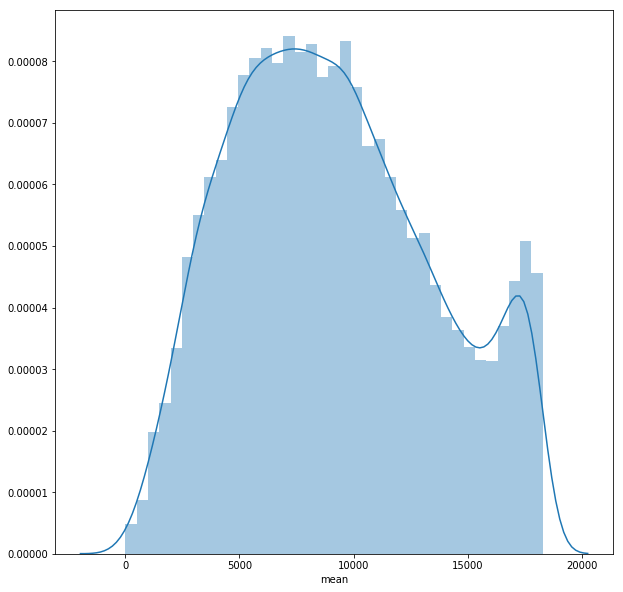

In [246]:
sns.distplot(stats['mean'].fillna(0))

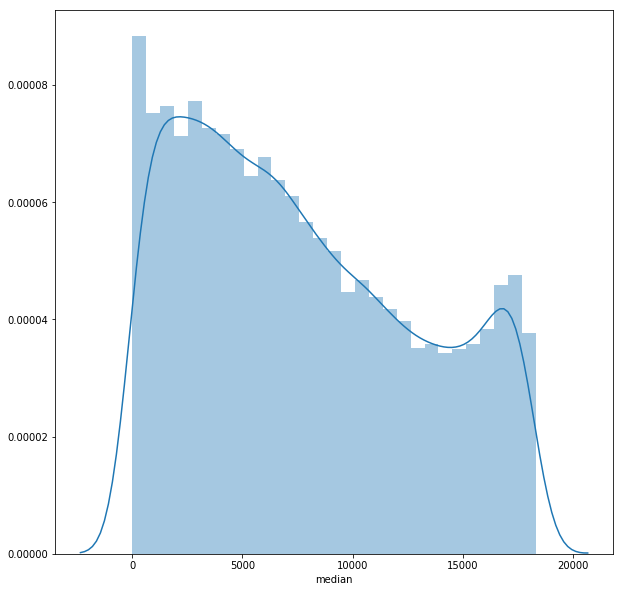

In [250]:
sns.distplot(stats['median'].fillna(0))

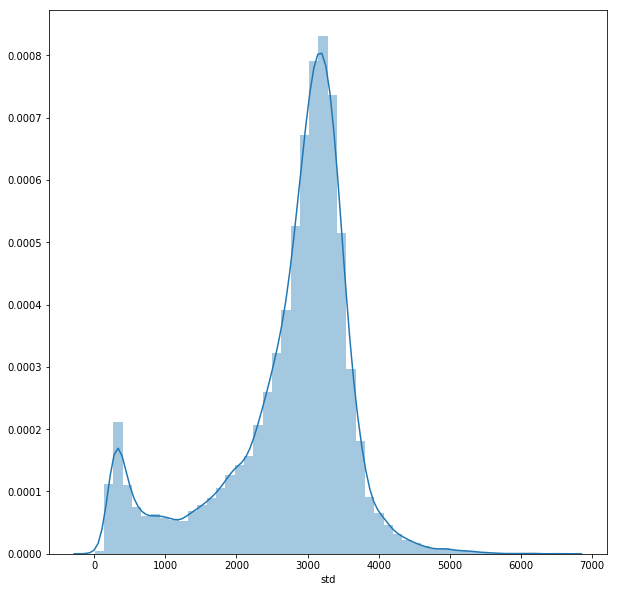

In [251]:
sns.distplot(stats['std'].fillna(0))

## Calculating Correlation Matrix for Cell Lines

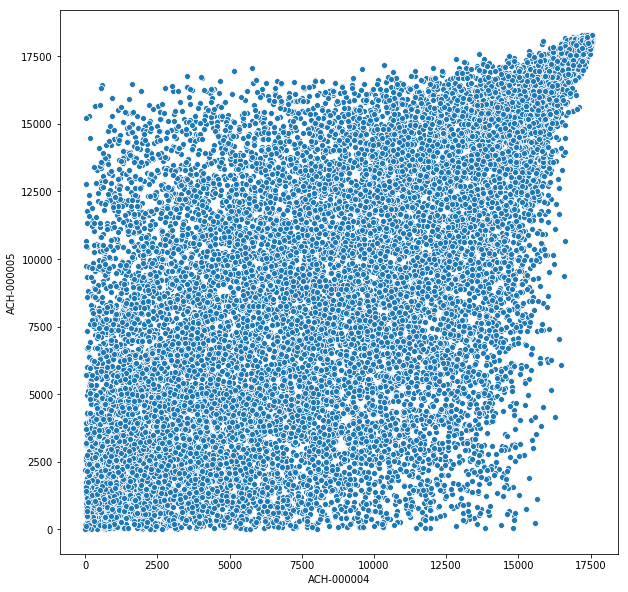

In [256]:
sns.scatterplot(x=ranks['ACH-000004'],y=ranks['ACH-000005'])

In [257]:
correlation_matrix = ranks[ranks.columns].corr()
correlation_matrix.head(5)

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001735,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956
ACH-000004,1.000000,0.629261,0.624370,0.666333,0.630026,0.693843,0.695018,0.636527,0.682450,0.658235,...,0.712724,0.680178,0.490510,0.674620,0.677290,0.659535,0.696404,0.584281,0.646931,0.714480
ACH-000005,0.629261,1.000000,0.578286,0.603746,0.614765,0.642996,0.654375,0.589318,0.635134,0.624684,...,0.659153,0.640137,0.468637,0.600251,0.631651,0.630577,0.657242,0.557930,0.610678,0.661086
ACH-000007,0.624370,0.578286,1.000000,0.683612,0.656175,0.693404,0.694829,0.639489,0.687276,0.665113,...,0.681288,0.667659,0.476004,0.655168,0.676164,0.666603,0.689267,0.598315,0.660279,0.714157
ACH-000009,0.666333,0.603746,0.683612,1.000000,0.681248,0.766020,0.751206,0.686143,0.744758,0.702650,...,0.737597,0.699709,0.517902,0.692505,0.722090,0.703546,0.747048,0.633466,0.689536,0.769797
ACH-000011,0.630026,0.614765,0.656175,0.681248,1.000000,0.711702,0.732991,0.677653,0.701527,0.694800,...,0.720066,0.694069,0.528279,0.673673,0.697370,0.717578,0.736599,0.637298,0.703216,0.755500


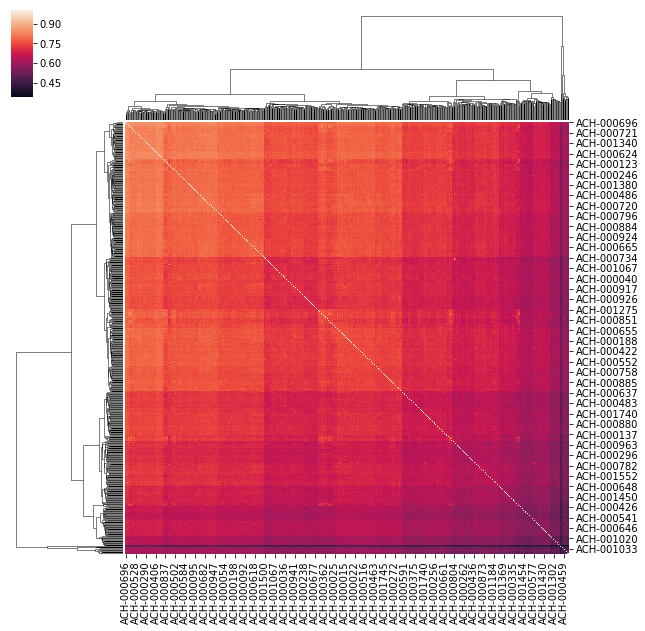

In [275]:
sns.clustermap(correlation_matrix)

# [This code continues on Google Collab here](https://colab.research.google.com/drive/1MJbvuvzVhiKs9dUJj78jkldzDDZl_W7c)